In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set()
%matplotlib inline

In [58]:
#import data
data = pd.read_csv(r'/Users/shivambadkas/Downloads/liver.csv')

In [59]:
(data.head())
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [60]:
#all features numeric except gender, classifier is 1 for liver disease and 2 for none
print(data.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [61]:
#use scikit imputation to fill in missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data['Albumin_and_Globulin_Ratio']=imp.fit_transform(data[['Albumin_and_Globulin_Ratio']])

In [62]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [73]:
#EDA: make correlation heatmap to see which features are correlated if any
X = data.drop(['Gender','Dataset'], axis=1)
plt.figure(figsize=(16, 6))
y = data['Dataset'] 
X.corr().style.background_gradient(cmap='coolwarm')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


<Figure size 1152x432 with 0 Axes>

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


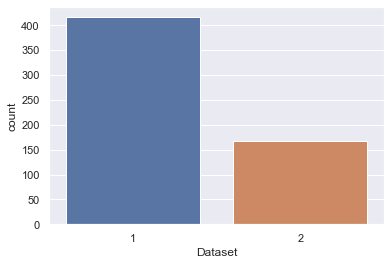

In [64]:
sns.countplot(data = data, x = 'Dataset', label='Count')
LD, NLD = data['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


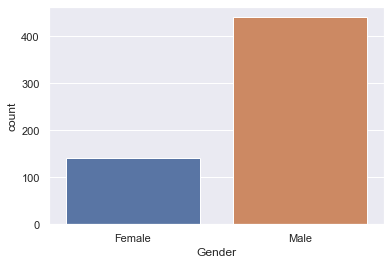

In [66]:
sns.countplot(data=data, x = 'Gender', label='Count')
M, F = data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [71]:
#import scikit modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [94]:
#create cross validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 9)
(408,)
(175, 9)
(175,)


In [95]:
# Decision tree 
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.14,random_state=1)
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(dt_accuracy)) 

Test set accuracy of dt: 0.69


In [96]:
#Logistic Regression
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter = 1000)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(lr_accuracy)) 

Test set accuracy of dt: 0.70


In [97]:
#K-Nearest Neighbors
KNN_1 = KNN(n_neighbors = 10)
KNN_1.fit(X_train,y_train)
KNN_y_pred = KNN_1.predict(X_test)
KNN_accuracy = accuracy_score(y_test, KNN_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(KNN_accuracy)) 

Test set accuracy of dt: 0.65


In [98]:
#Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=25, random_state=1)
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(r_accuracy)) 

Test set accuracy of dt: 0.65


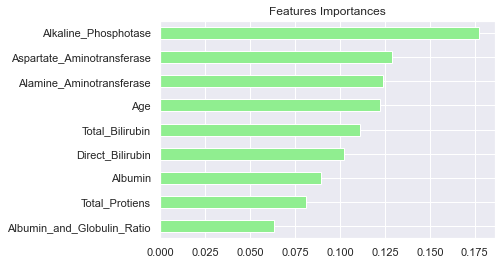

In [101]:
#Use random forest to see feature importance
importance = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)
#sort
importance_sorted = importance.sort_values()

importance_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [103]:
#create tuple of tests to automate. Observe that the pattern follows a define -> fit -> predict -> test accuracy pipeline
classifiers = [('Decision Tree',dt),('Logistic Regression',lr),('KNN',KNN_1), ('Random Forest', rf)]

#for loop to iterate through 

for clf_name, clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Decision Tree : 0.686
Logistic Regression : 0.697
KNN : 0.651
Random Forest : 0.691


In [106]:
#Model Evaluation: ROC Curves; trade-off between recall and specificity, basically 0s get labelled as 1s when 
#you capture more 1s, ROC curve plots sensitivity on y-axis and specificity on y-axis. Need to sort probability 
#of each record being a 1 from most to least likely, then compute cumulative specificity and recall 
#first find probability of a record being 1 
y_score1 = dt.predict_proba(X_test)[:,1]
y_score2 = lr.predict_proba(X_test)[:,1]
y_score3 = KNN_1.predict_proba(X_test)[:,1]
y_score4 = rf.predict_proba(X_test)[:,1]

#Find AUC score, an ineffective classifier will have a value of 0.5. Larger AUC value means better classifier
print('ROC DecisionTree: ', roc_auc_score(y_test, y_score1))
print('ROC Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('ROC KNN: ', roc_auc_score(y_test, y_score3))
print('ROC Random Forest: ', roc_auc_score(y_test, y_score4))

ROC DecisionTree:  0.6856419987349779
ROC Logistic Regression:  0.7365591397849462
ROC KNN:  0.6859582542694497
ROC Random Forest:  0.7283364958886781


In [113]:

results = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression', 'KNN','Random Forest Classifier'],  'Roc_Score': [roc_auc_score(y_test, y_score1), roc_auc_score(y_test, y_score2),roc_auc_score(y_test, y_score3), roc_auc_score(y_test, y_score4)],
                       'Accuracy_Score': [dt_acc_test, lr_acc_test,KNN_accuracy, rf_accuracy]})
df_results = results.sort_values(by='Roc_Score', ascending=False)
df_results

,Model,Roc_Score,Accuracy_Score
1,Logistic Regression,0.736559,0.697143
3,Random Forest Classifier,0.728336,0.691429
2,KNN,0.685958,0.651429
0,Decision Tree,0.685642,0.685714
